In [2]:
library(tidyverse)

In [4]:
data_url <- "https://raw.githubusercontent.com/hannansatopay/DSML-R/master/kagglesurvey.csv"
responses <- read_csv(data_url)

Parsed with column specification:
cols(
  Respondent = col_double(),
  WorkToolsSelect = col_character(),
  LanguageRecommendationSelect = col_character(),
  EmployerIndustry = col_character(),
  WorkAlgorithmsSelect = col_character()
)


In [5]:
head(responses)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression"
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs"
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression"
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA
6,SQL,Python,Non-profit,NA


In [14]:
ml_algorithms <- responses  %>% 
    mutate(algorithms = strsplit(responses$WorkAlgorithmsSelect, ",")) %>% 
    unnest(algorithms)

In [16]:
head(ml_algorithms, n = 3)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,algorithms
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Neural Networks
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Random Forests
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",RNNs


In [17]:
# Grouping the data by algorithms, calculate the number of responses in each group
algorithm_count <- ml_algorithms  %>% 
    group_by(algorithms)  %>%
    summarise(count = n())

# Sorting algorithm_count so that the most popular tools are at the top
algorithm_count <- algorithm_count %>% 
    arrange(desc(count))

# remove NA values from algorithm_count
algorithm_count <- algorithm_count %>% drop_na()

# Printing the first 6 results
head(algorithm_count)

algorithms,count
Regression/Logistic Regression,4636
Decision Trees,3640
Random Forests,3378
Neural Networks,2743
Bayesian Techniques,2236
Ensemble Methods,2078


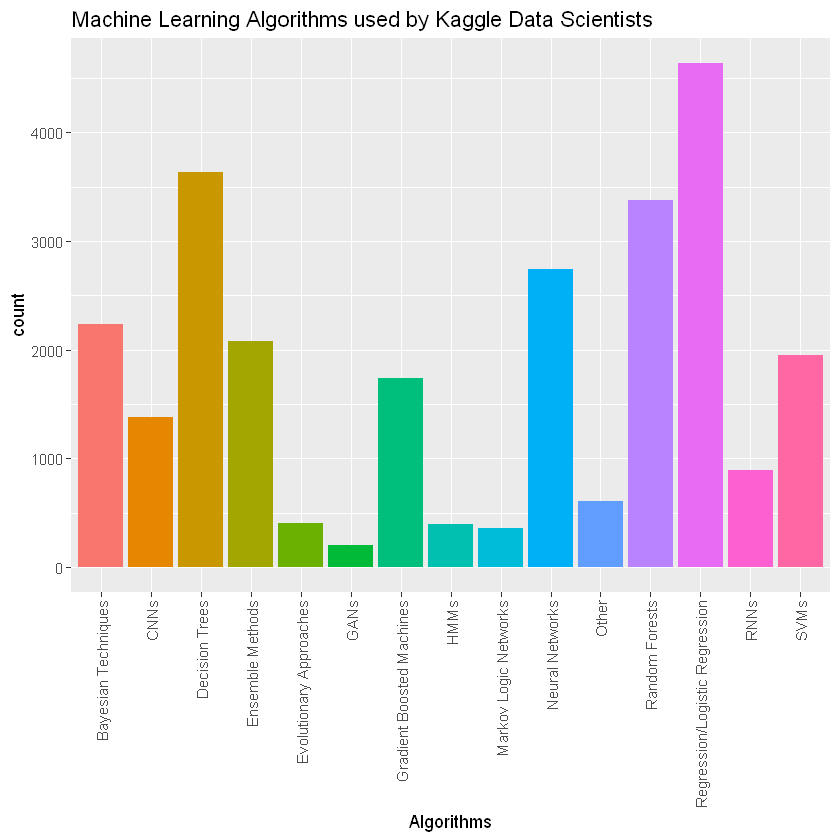

In [41]:
# Creating a bar chart of the work_tools column. 
# Arranging the bars so that the tallest are on the far right
ggplot(algorithm_count,
       aes(x = algorithms, y = count, fill=algorithms)) + 
       geom_bar(stat = "identity") + 
       ggtitle("Machine Learning Algorithms used by Kaggle Data Scientists") +
       xlab("Algorithms") +
       theme(axis.text.x = element_text(angle=90,
                                        vjust=0.5,
                                        hjust=1), legend.position="none")

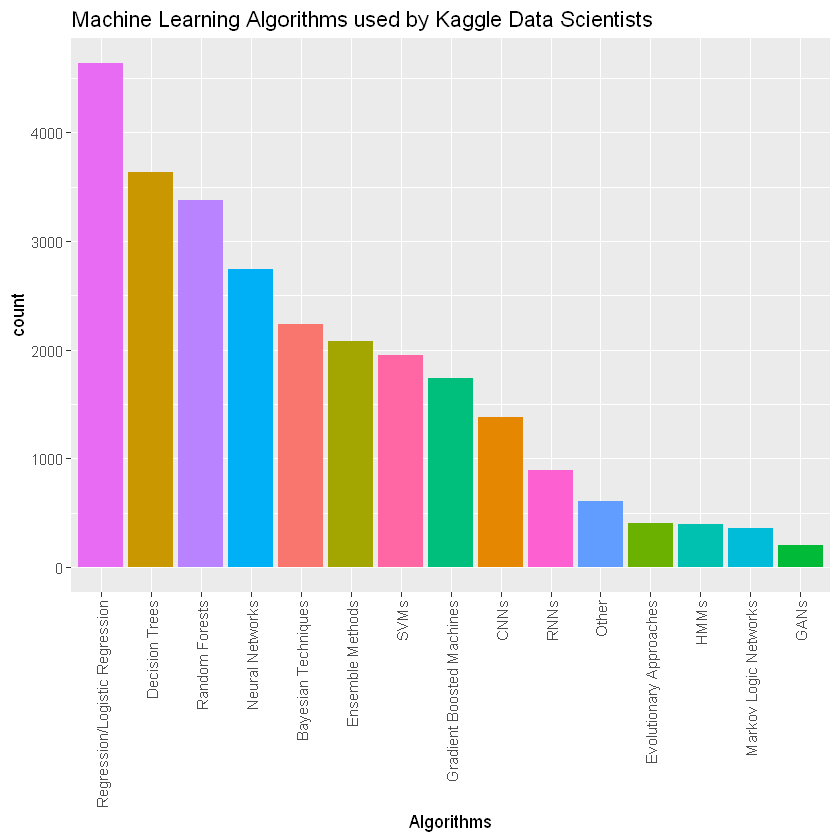

In [42]:
# Creating a bar chart of the work_tools column. 
# Arranging the bars so that the tallest are on the far right
ggplot(algorithm_count,
       aes(x = reorder(algorithms, -count), y = count, fill=algorithms)) + 
       geom_bar(stat = "identity") + 
       ggtitle("Machine Learning Algorithms used by Kaggle Data Scientists") +
       xlab("Algorithms") +
       theme(axis.text.x = element_text(angle=90,
                                        vjust=0.5,
                                        hjust=1), legend.position="none")

In [43]:
tools <- responses  %>% 
    mutate(work_tools = strsplit(responses$WorkToolsSelect, ",")) %>% 
    unnest(work_tools)

In [44]:
head(tools)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,work_tools
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Amazon Web services
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Oracle Data Mining/ Oracle R Enterprise
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Perl
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Machine Learning
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Amazon Web services
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",Cloudera


In [45]:
# Grouping the data by work_tools, calculate the number of responses in each group
tool_count <- tools  %>% 
    group_by(work_tools)  %>%
    summarise(count = n())

# Sorting tool_count so that the most popular tools are at the top
tool_count <- tool_count %>% 
    arrange(desc(count))

# remove NA values from tool_count dataframe
tool_count <- tool_count %>% drop_na()

# Printing the first 6 results
head(tool_count)

work_tools,count
Python,6073
R,4708
SQL,4261
Jupyter notebooks,3206
TensorFlow,2256
Amazon Web services,1868


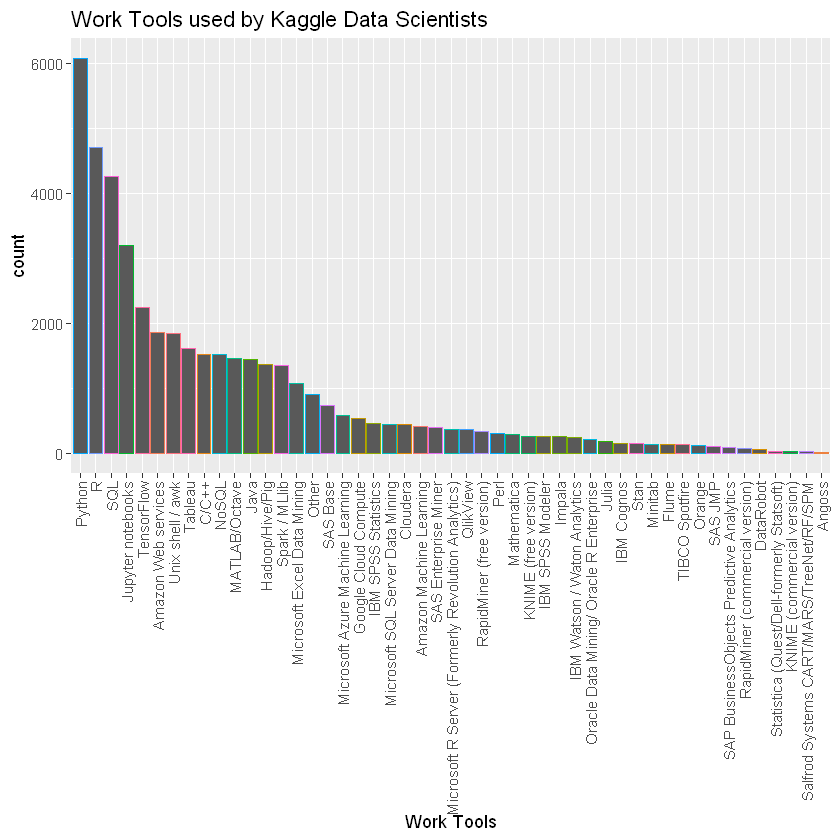

In [46]:
# Creating a bar chart of the work_tools column. 
# Arranging the bars so that the tallest are on the far right
ggplot(subset(tool_count, !is.na(work_tools)),
       aes(x = reorder(work_tools, -count), y = count, color=work_tools)) + 
       geom_bar(stat = "identity") + 
       ggtitle("Work Tools used by Kaggle Data Scientists") +
       xlab("Work Tools") +
       theme(axis.text.x = element_text(angle=90,
                                        vjust=0.5,
                                        hjust=1), legend.position="none")

In [47]:
# Creating a new column called language preference, based on the conditions specified in the Instructions
debate_tools <- responses  %>% 
   mutate(language_preference = case_when(
       grepl("R", WorkToolsSelect) & !grepl("Python", WorkToolsSelect) ~ "R",
       !grepl("R", WorkToolsSelect) & grepl("Python", WorkToolsSelect) ~ "Python",
       grepl("R", WorkToolsSelect) & grepl("Python", WorkToolsSelect) ~ "both",
       !grepl("R", WorkToolsSelect) & !grepl("Python", WorkToolsSelect) ~ "neither"
   ))

In [48]:
head(debate_tools)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,language_preference
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",R
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",both
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs",both
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression",Python
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA,R
6,SQL,Python,Non-profit,NA,neither


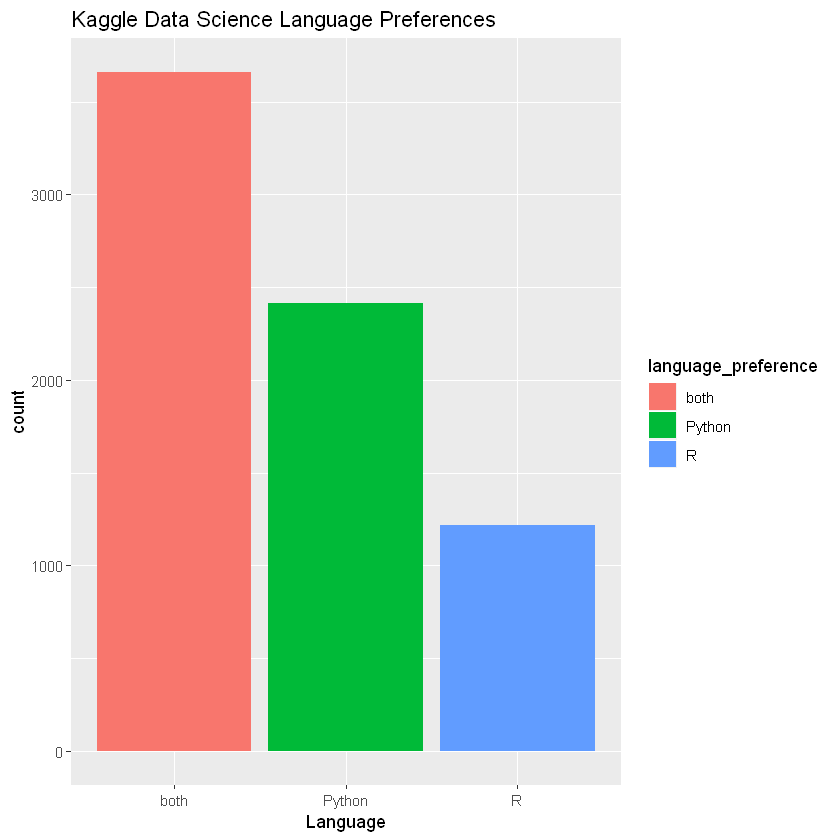

In [57]:
# Grouping by language preference and calculate number of responses
debate_plot <- debate_tools  %>% 
   group_by(language_preference)  %>% 
   summarise(count = n())  %>% 
   filter(language_preference!="neither") %>%
   arrange(desc(count))

# Creating a bar chart
ggplot(debate_plot,
       aes(x = language_preference, y = count, fill = language_preference)) +
       geom_bar(stat='identity') +
       ggtitle("Kaggle Data Science Language Preferences") +
       xlab("Language")